In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix , precision_score, recall_score, f1_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
df= pd.read_csv(r"test.csv" )


In [3]:
df.T


,0,1,2,3,4,5,6,7,8,9,...,25966,25967,25968,25969,25970,25971,25972,25973,25974,25975
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,25966,25967,25968,25969,25970,25971,25972,25973,25974,25975
id,19556,90035,12360,77959,36875,39177,79433,97286,27508,62482,...,30263,90347,86816,120654,25309,78463,71167,37675,90086,34799
Gender,Female,Female,Male,Male,Female,Male,Female,Female,Male,Female,...,Male,Female,Male,Male,Female,Male,Male,Female,Male,Female
Customer Type,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,...,disloyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,disloyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,52,36,20,44,49,16,77,43,47,46,...,42,39,41,52,36,34,23,17,14,42
Type of Travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,...,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Personal Travel,Business travel,Personal Travel
Class,Eco,Business,Eco,Business,Eco,Eco,Business,Business,Eco,Business,...,Eco,Business,Eco,Business,Eco,Business,Business,Eco,Business,Eco
Flight Distance,160,2863,192,3377,1182,311,3987,2556,556,1744,...,1024,404,692,280,432,526,646,828,1127,264
Inflight wifi service,5,1,2,0,2,3,5,2,5,2,...,4,1,2,3,1,3,4,2,3,2
Departure/Arrival time convenient,4,1,0,0,3,3,5,2,2,2,...,4,1,2,3,5,3,4,5,3,5


In [4]:
df.drop('id', axis=1, inplace=True)

In [5]:
df.T


,0,1,2,3,4,5,6,7,8,9,...,25966,25967,25968,25969,25970,25971,25972,25973,25974,25975
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,25966,25967,25968,25969,25970,25971,25972,25973,25974,25975
Gender,Female,Female,Male,Male,Female,Male,Female,Female,Male,Female,...,Male,Female,Male,Male,Female,Male,Male,Female,Male,Female
Customer Type,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,...,disloyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,disloyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,52,36,20,44,49,16,77,43,47,46,...,42,39,41,52,36,34,23,17,14,42
Type of Travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,...,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Personal Travel,Business travel,Personal Travel
Class,Eco,Business,Eco,Business,Eco,Eco,Business,Business,Eco,Business,...,Eco,Business,Eco,Business,Eco,Business,Business,Eco,Business,Eco
Flight Distance,160,2863,192,3377,1182,311,3987,2556,556,1744,...,1024,404,692,280,432,526,646,828,1127,264
Inflight wifi service,5,1,2,0,2,3,5,2,5,2,...,4,1,2,3,1,3,4,2,3,2
Departure/Arrival time convenient,4,1,0,0,3,3,5,2,2,2,...,4,1,2,3,5,3,4,5,3,5
Ease of Online booking,3,3,2,0,4,3,5,2,2,2,...,4,1,2,3,1,3,4,1,3,2


In [6]:
print(df.shape)
print("The number of rows : " , df.shape[0])
print("The number of columns : " , df.shape[1])

(25976, 24)
The number of rows :  25976
The number of columns :  24


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

In [8]:
df.isna().sum()

,0
Unnamed: 0,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0


Deal with missing value in Arrival Delay in Minutes column¶


In [9]:
df["Arrival Delay in Minutes"].isna().sum()

83

In [10]:
df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].mean() , inplace=True)

<ipython-input-10-e46e0095fcea>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].mean() , inplace=True)


In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,Unnamed: 0,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25976.000000
mean,12987.500000,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.457549
min,0.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [13]:
df.describe(include=['O'])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,25976,25976,25976,25976,25976
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,13172,21177,18038,12495,14573


In [14]:
cor = df.corr(numeric_only=True)
cor

,Unnamed: 0,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Unnamed: 0,1.000000,-0.007964,-0.002470,-0.003085,-0.003962,-0.002011,-0.001360,-0.010858,-0.000254,-0.005602,-0.012927,0.001180,-0.004194,0.000349,0.002773,-0.008069,-0.005058,-0.005948,-0.002970
Age,-0.007964,1.000000,0.099409,0.009242,0.032449,0.013565,0.003308,0.023841,0.202058,0.154507,0.068998,0.054977,0.033299,-0.049863,0.025388,-0.059083,0.048418,-0.004334,-0.007387
Flight Distance,-0.002470,0.099409,1.000000,0.005007,-0.014401,0.062989,0.008410,0.057322,0.214629,0.158957,0.137538,0.117880,0.136995,0.071549,0.075720,0.066355,0.105578,0.003446,0.000130
Inflight wifi service,-0.003085,0.009242,0.005007,1.000000,0.349137,0.710684,0.347790,0.122306,0.459366,0.116991,0.201782,0.113658,0.159699,0.118199,0.046046,0.108419,0.125768,-0.010078,-0.012251
Departure/Arrival time convenient,-0.003962,0.032449,-0.014401,0.349137,1.000000,0.440230,0.458439,-0.016006,0.080937,-0.001926,-0.022326,0.060982,0.003373,0.065684,0.082461,0.067804,-0.007670,-0.000238,-0.001343
Ease of Online booking,-0.002011,0.013565,0.062989,0.710684,0.440230,1.000000,0.465514,0.025141,0.408003,0.022811,0.044715,0.039988,0.116754,0.040685,-0.000108,0.035769,0.010974,-0.001062,-0.003155
Gate location,-0.001360,0.003308,0.008410,0.347790,0.458439,0.465514,1.000000,-0.009694,0.006993,-0.000721,-0.000340,-0.031606,-0.002428,-0.004395,-0.054954,-0.005129,-0.014195,0.008039,0.007760
Food and drink,-0.010858,0.023841,0.057322,0.122306,-0.016006,0.025141,-0.009694,1.000000,0.229601,0.580970,0.627265,0.050688,0.035870,0.037617,0.076775,0.039992,0.659253,-0.025957,-0.028272
Online boarding,-0.000254,0.202058,0.214629,0.459366,0.080937,0.408003,0.006993,0.229601,1.000000,0.415414,0.279391,0.149430,0.120354,0.084583,0.203309,0.071972,0.320912,-0.021037,-0.025833
Seat comfort,-0.005602,0.154507,0.158957,0.116991,-0.001926,0.022811,-0.000721,0.580970,0.415414,1.000000,0.616817,0.124805,0.099150,0.074927,0.182469,0.067306,0.683924,-0.028341,-0.032981


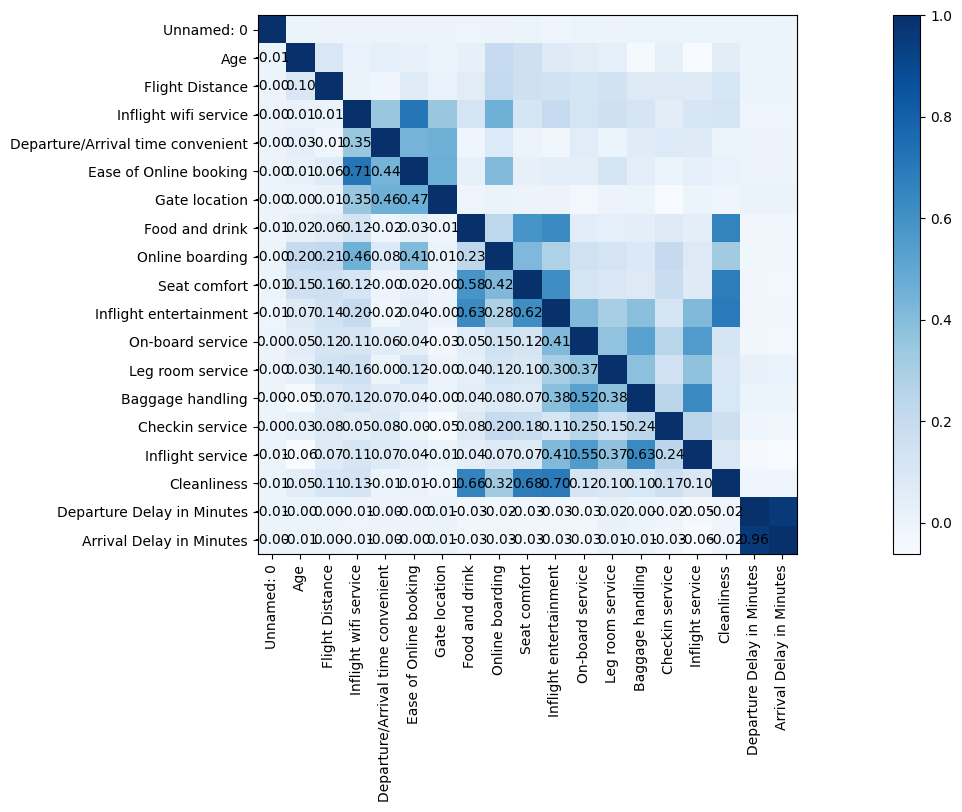

In [15]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(25, 7))
plt.imshow(corr, cmap='Blues')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr)):
    for j in range(len(corr)):
        if not mask[i, j]:
            plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()

In [16]:
df.Gender.value_counts(normalize=True)*100


,proportion
Gender,
Female,50.708346
Male,49.291654


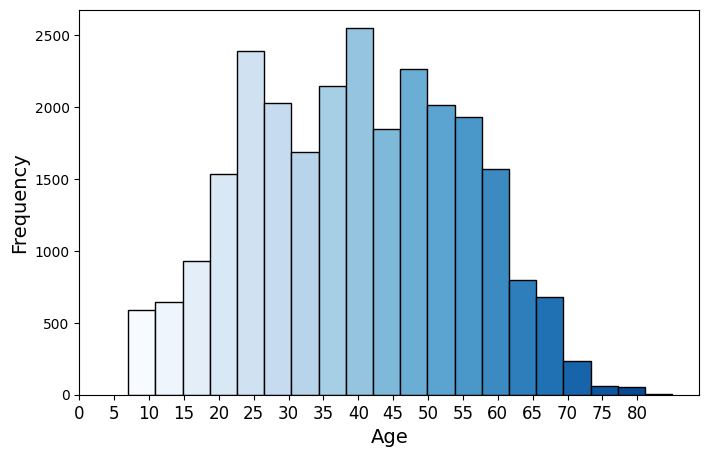

In [17]:
plt.figure(figsize=(8, 5))
n, bins, patches = plt.hist(df["Age"], bins=20, edgecolor='black')
cmap = plt.get_cmap('Blues')
norm = plt.Normalize(vmin=min(bins), vmax=max(bins))

for patch, bin_value in zip(patches, bins):
    color = cmap(norm(bin_value))
    patch.set_facecolor(color)

plt.xticks(ticks=np.arange(0, df["Age"].max(), step=5), fontsize=12)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)


plt.show()


In [18]:
df.Age.min()

7

In [19]:
df.Age.max()

85

In [20]:
df.Age.describe()

,Age
count,25976.000000
mean,39.620958
std,15.135685
min,7.000000
25%,27.000000
50%,40.000000
75%,51.000000
max,85.000000


In [21]:
cut_series = pd.cut(df['Age'], bins=[5, 15, 30, 45, 60, 75, 85], labels=['5-15', '15-30', '30-45', '45-60', '60-75', '75-85'])
value_counts = cut_series.value_counts()

percentage_distribution = (value_counts / df['Age'].shape[0]).mul(100).round(2)

print("Distribution (Counts):")
print(value_counts)
print("\nDistribution (Percentage):")
print(percentage_distribution)

Distribution (Counts):
Age
30-45    8230
45-60    7545
15-30    6705
60-75    1983
5-15     1418
75-85      95
Name: count, dtype: int64

Distribution (Percentage):
Age
30-45    31.68
45-60    29.05
15-30    25.81
60-75     7.63
5-15      5.46
75-85     0.37
Name: count, dtype: float64


In [22]:
df.satisfaction.value_counts()

,count
satisfaction,
neutral or dissatisfied,14573
satisfied,11403


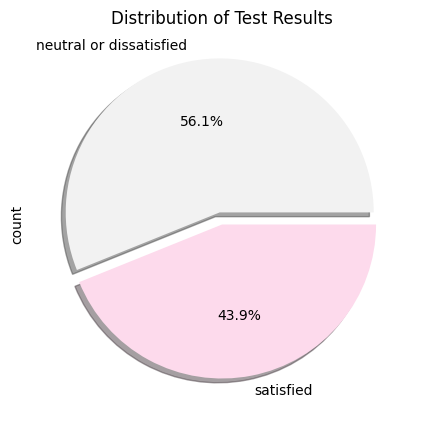

In [23]:
colors = plt.get_cmap('Pastel1_r').colors

df.satisfaction.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7,5), title='Distribution of Test Results', explode=(0.08,0) , shadow=True , colors=colors)
plt.show()

In [24]:
df["Type of Travel"].value_counts()

,count
Type of Travel,
Business travel,18038
Personal Travel,7938


<Axes: title={'center': 'Distribution of  Travel Type'}, ylabel='count'>

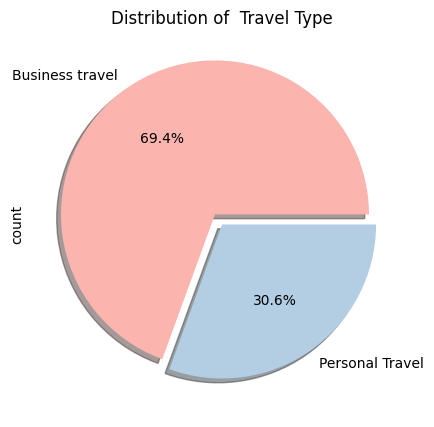

In [25]:
colors = plt.get_cmap('Pastel1').colors
df["Type of Travel"].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5), title='Distribution of  Travel Type', explode=(0.08,0 ) , shadow=True , colors=colors)

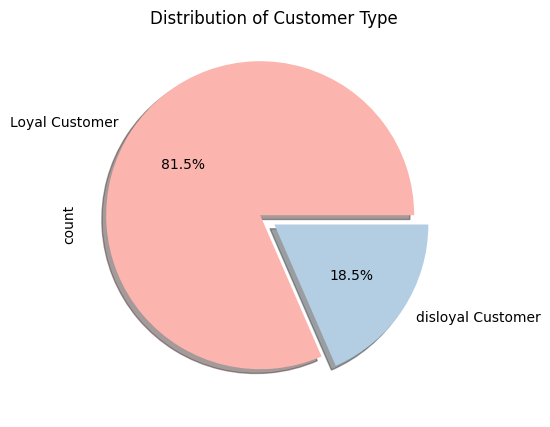

In [26]:
colors = plt.get_cmap('Pastel1').colors
df["Customer Type"].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5), title='Distribution of Customer Type', explode=(0.11,0 ) , shadow=True , colors=colors)
plt.show()

<ipython-input-27-abe646d46dc3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.countplot(x='Class', data=df, palette={"Eco":"#FFB4C2" , "Business": "#9DBDFF" , "Eco Plus": "#E8C5E5"} , width=0.5)


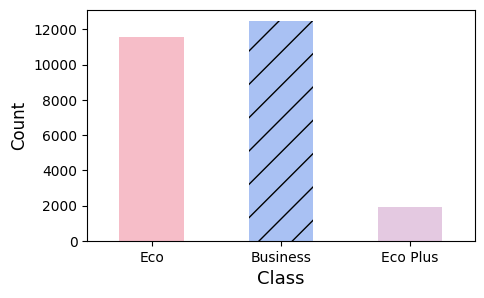

In [27]:
plt.figure(figsize=(5, 3))
ax =sns.countplot(x='Class', data=df, palette={"Eco":"#FFB4C2" , "Business": "#9DBDFF" , "Eco Plus": "#E8C5E5"} , width=0.5)
plt.xlabel("Class", fontsize=13)
plt.ylabel("Count", fontsize=12)
middle_index = len(ax.patches) // 2
ax.patches[middle_index].set_hatch('/')

plt.show()

We observe :

Most business travel is in business class.

Most personal travel is in Eco Class.

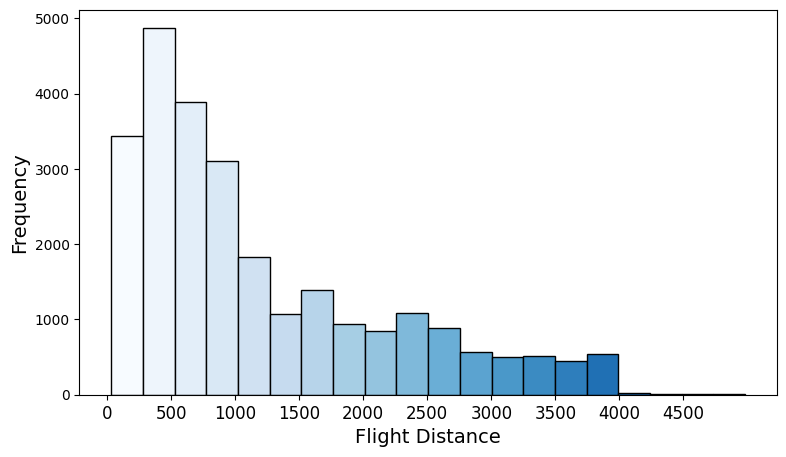

In [28]:
plt.figure(figsize=(9, 5))
n, bins, patches = plt.hist(df["Flight Distance"], bins=20, edgecolor='black')
cmap = plt.get_cmap('Blues')
norm = plt.Normalize(vmin=min(bins), vmax=max(bins))

for patch, bin_value in zip(patches, bins):
    color = cmap(norm(bin_value))
    patch.set_facecolor(color)

plt.xticks(ticks=np.arange(0, df["Flight Distance"].max(), step=500), fontsize=12)
plt.xlabel("Flight Distance", fontsize=14)
plt.ylabel("Frequency", fontsize=14)


plt.show()

In [29]:
# 0<1000 , 1000<2000 , 2000 < 3000 , 3000<4000 , 4000<5000
cut_series = pd.cut(df['Flight Distance'], bins=[0, 1000, 2000, 3000, 4000, 5000], labels=['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000'])
value_counts = cut_series.value_counts()

percentage_distribution = (value_counts / df['Flight Distance'].shape[0]).mul(100).round(2)

print("Distribution (Counts):")
print(value_counts)
print("\nDistribution (Percentage):")
print(percentage_distribution)

Distribution (Counts):
Flight Distance
0-1000       15038
1000-2000     5484
2000-3000     3406
3000-4000     2028
4000-5000       20
Name: count, dtype: int64

Distribution (Percentage):
Flight Distance
0-1000       57.89
1000-2000    21.11
2000-3000    13.11
3000-4000     7.81
4000-5000     0.08
Name: count, dtype: float64


In [30]:
outlier= df[df["Flight Distance"] >4000]
outlier

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
273,273,Female,Loyal Customer,57,Business travel,Business,4817,4,4,4,...,3,3,4,4,5,4,5,0,19.0,satisfied
3645,3645,Male,Loyal Customer,44,Business travel,Business,4963,5,5,5,...,3,3,4,4,4,5,4,0,0.0,satisfied
3795,3795,Female,Loyal Customer,45,Personal Travel,Eco,4243,1,5,1,...,1,2,3,3,3,2,3,6,0.0,neutral or dissatisfied
3953,3953,Male,Loyal Customer,44,Business travel,Business,4963,5,5,5,...,3,2,3,4,4,4,4,0,0.0,satisfied
7851,7851,Female,Loyal Customer,33,Business travel,Business,4983,1,1,1,...,4,1,4,5,4,3,4,0,0.0,satisfied
11779,11779,Female,Loyal Customer,45,Personal Travel,Eco,4983,3,1,3,...,2,5,2,3,1,4,1,2,0.0,neutral or dissatisfied
13464,13464,Male,Loyal Customer,60,Business travel,Business,4243,3,3,3,...,3,5,3,5,5,4,5,18,23.0,satisfied
13666,13666,Female,disloyal Customer,25,Business travel,Business,4243,1,4,1,...,3,2,3,5,3,4,3,0,1.0,neutral or dissatisfied
14261,14261,Male,Loyal Customer,46,Business travel,Business,4983,1,1,1,...,1,3,5,5,4,3,4,0,0.0,satisfied
14591,14591,Male,Loyal Customer,41,Personal Travel,Eco,4963,2,4,2,...,4,5,4,3,3,2,3,0,4.0,neutral or dissatisfied


In [31]:
df=df[df["Flight Distance"] <= 4000]
df

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [32]:
cut_series = pd.cut(df['Flight Distance'], bins=[0, 1000, 2000, 3000, 4000, 5000], labels=['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000'])
distribution_counts = pd.crosstab( cut_series , df["Type of Travel"])
distribution_percentages = pd.crosstab(cut_series, df["Type of Travel"], normalize='columns').mul(100).round(2)

print("Distribution (Counts):")
print(distribution_counts)
print("\nDistribution (Percentages):")
print(distribution_percentages)

Distribution (Counts):
Type of Travel   Business travel  Personal Travel
Flight Distance                                  
0-1000                      9218             5820
1000-2000                   3829             1655
2000-3000                   2953              453
3000-4000                   2021                7

Distribution (Percentages):
Type of Travel   Business travel  Personal Travel
Flight Distance                                  
0-1000                     51.15            73.35
1000-2000                  21.25            20.86
2000-3000                  16.39             5.71
3000-4000                  11.21             0.09


In [33]:
def addlabels(x, y):
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        plt.text(p.get_x() + p.get_width() / 2., height, f'{percentage:.1f}%',
                 ha='center', va='bottom', fontsize=10, color='black')

([<matplotlib.patches.Wedge at 0x7cc7ed2a9c90>,
 [Text(-0.10806728304175613, 1.0946787027872484, 'No rated'),
  Text(-1.1487516527534671, 0.053569023662725396, 'low Satisfaction'),
  Text(0.5024239893605401, -0.9785551261503055, 'middle Satisfaction'),
  Text(0.8956894089645907, 0.6385455995218057, 'high Satisfaction')],
 [Text(-0.05894579075004879, 0.59709747424759, '3.1%'),
  Text(-0.6492944124258727, 0.030278143809366522, '42.3%'),
  Text(0.27404944874211273, -0.5337573415365302, '24.3%'),
  Text(0.4885578594352312, 0.3482975997391667, '30.3%')])

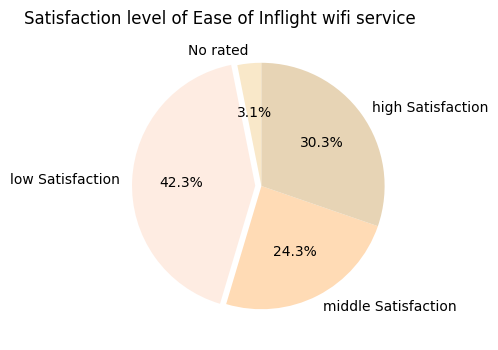

In [34]:
satisfaction_4_5 = df["Inflight wifi service"].isin([4, 5]).sum()
satisfaction_3 = df["Inflight wifi service"].isin([3]).sum()

low_satisfaction = df["Inflight wifi service"].isin([1, 2]).sum()
No_rated = df["Inflight wifi service"].isin([0]).sum()

sizes = [No_rated , low_satisfaction, satisfaction_3 ,satisfaction_4_5   ]
label_name = np.array(["No rated", "low Satisfaction", "middle Satisfaction" ,"high Satisfaction"])

plt.figure(figsize=(11, 4))

plt.subplot(1, 2, 2)
plt.title("Satisfaction level of Ease of Inflight wifi service", loc="right")

plt.pie(sizes, labels=label_name, autopct='%1.1f%%', startangle=90, colors=["#F9E8C9" ,"#FEECE2","#FFDBB5" , "#E7D4B5" ], explode=( 0 , 0.05 , 0,0))


In [35]:
new_df = df.groupby(["Class"])["Inflight wifi service"].value_counts(normalize=True).mul(100).round(2).unstack()
new_df

Inflight wifi service,0,1,2,3,4,5
Class,,,,,,
Business,4.09,18.05,21.95,22.07,19.50,14.33
Eco,2.08,16.48,28.27,26.52,18.88,7.77
Eco Plus,3.23,16.90,24.93,25.82,18.83,10.28


In [36]:
total_low_satisfaction = 42.3

business_low_satisfaction = (new_df.loc["Business", 1:2].sum() / new_df.loc[:, 1:2].sum().sum()) * total_low_satisfaction
eco_low_satisfaction = (new_df.loc["Eco", 1:2].sum() / new_df.loc[:, 1:2].sum().sum()) * total_low_satisfaction
eco_plus_low_satisfaction = (new_df.loc["Eco Plus", 1:2].sum() / new_df.loc[:, 1:2].sum().sum()) * total_low_satisfaction

print("percentage of Business class and low satisfaction with Inflight wifi service:", round(business_low_satisfaction, 2), "%")
print("percentage of Eco class and low satisfaction with Inflight wifi service:", round(eco_low_satisfaction, 2), "%")
print("percentage of Eco Plus class and low satisfaction with Inflight wifi service:", round(eco_plus_low_satisfaction, 2), "%")

percentage of Business class and low satisfaction with Inflight wifi service: 13.37 %
percentage of Eco class and low satisfaction with Inflight wifi service: 14.95 %
percentage of Eco Plus class and low satisfaction with Inflight wifi service: 13.98 %


In [37]:
new_df = df.groupby(["Type of Travel"])["Inflight wifi service"].value_counts(normalize=True).mul(100).round(2).unstack()
new_df

Inflight wifi service,0,1,2,3,4,5
Type of Travel,,,,,,
Business travel,3.66,16.60,22.76,22.14,20.63,14.22
Personal Travel,1.94,18.78,30.04,29.31,15.88,4.05


High percentage of Low Satisfaction with onboard WiFi can be caused by several possible causes, including

1.Internet speed is insufficient: Many travelers may find that WiFi speed is unsatisfactory and does not meet their needs while flying, especially if they are trying to upload or stream content or work online.

2.Disconnect: There can be a problem with the stability of Wi-Fi connectivity, as travelers may experience continuous disconnection, causing frustration and leading to low ratings.

3.Service cost: Some airlines may charge extra for Wi-Fi. If the cost is high compared to the quality of service, passengers may feel dissatisfied and prefer not to use the service or give it a low rating.

4.Restrictions on use: Airlines may impose restrictions on the amount of data or applications allowed to be used via Wi-Fi, resulting in an incomplete experience for users who may wish to access certain sites or applications.

5.Comparison with expectations: If passenger expectations are higher than reality, they may be disappointed, especially if the WiFi experience on the plane compares with high-quality Internet services on the ground

What can be inferred ?

The ratio of dissatisfaction between categories: The proportions of dissatisfaction among the three categories are very close. This suggests that the low level of satisfaction with Wi-Fi is a general problem that affects all categories of passengers similarly, not limited to a particular category.

Also based on visual data in the chart, this suggests that airlines may need to improve this service to better meet passengers' expectations, which may lead to improved overall customer satisfaction ratings.

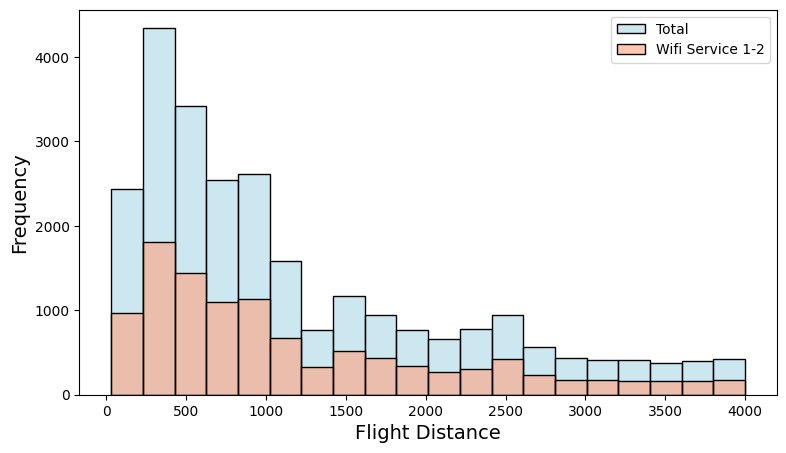

NameError: name 'opt' is not defined

In [38]:
plt.figure(figsize=(9, 5))
sns.histplot(data=df, x="Flight Distance", bins=20, edgecolor='black', color='lightblue', alpha=0.6, label='Total')
sns.histplot(data=df[df["Inflight wifi service"].isin([1, 2])],
             x="Flight Distance", bins=20, edgecolor='black', color='#FFA27F', alpha=0.6, label='Wifi Service 1-2')

plt.xlabel("Flight Distance", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend()

plt.show()
/opt/conda/li

In [39]:
cut_series = pd.cut(df['Flight Distance'], bins=[0, 1000, 2000, 3000, 4000, 5000], labels=['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000'])
distribution_counts = pd.crosstab(cut_series, df['Inflight wifi service'].isin([1, 2]), colnames=["Wifi Service 1-2"]).rename(columns={True: "   Wifi Service 1-2", False: "Total"})

distribution_percentages = pd.crosstab(cut_series, df['Inflight wifi service'].isin([1, 2]), normalize='columns', colnames=["Wifi Service 1-2"]).mul(100).round(2).rename(columns={True: "     Wifi Service 1-2", False: "Total"})

print("Distribution (Counts):")
print(distribution_counts)
print("\nDistribution (Percentages):")
print(distribution_percentages)

Distribution (Counts):
Wifi Service 1-2  Total     Wifi Service 1-2
Flight Distance                             
0-1000             8732                 6306
1000-2000          3073                 2411
2000-3000          1987                 1419
3000-4000          1197                  831

Distribution (Percentages):
Wifi Service 1-2  Total       Wifi Service 1-2
Flight Distance                               
0-1000            58.26                  57.50
1000-2000         20.50                  21.98
2000-3000         13.26                  12.94
3000-4000          7.99                   7.58


([<matplotlib.patches.Wedge at 0x7cc7ed639d50>,
 [Text(-1.1131552628417982, 0.28876523476278676, 'low Satisfaction'),
  Text(0.26816449465998804, -1.0668119814680344, 'middle Satisfaction'),
  Text(0.9652963130285608, 0.5274495502448239, 'high Satisfaction')],
 [Text(-0.6291747137801467, 0.1632151326920099, '41.9%'),
  Text(0.14627154254181166, -0.5818974444371096, '24.0%'),
  Text(0.5265252616519421, 0.28769975467899483, '34.1%')])

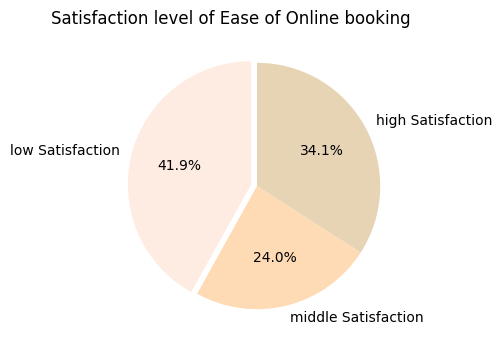

In [40]:
satisfaction_4_5 = df["Ease of Online booking"].isin([4, 5]).sum()
satisfaction_3 = df["Ease of Online booking"].isin([3]).sum()

low_satisfaction = df["Ease of Online booking"].isin([1, 2]).sum()

sizes = [low_satisfaction, satisfaction_3 ,satisfaction_4_5   ]
label_name = np.array(["low Satisfaction", "middle Satisfaction" ,"high Satisfaction"])

plt.figure(figsize=(11, 4))

plt.subplot(1, 2, 2)
plt.title("Satisfaction level of Ease of Online booking", loc="right")
plt.pie(sizes, labels=label_name, autopct='%1.1f%%', startangle=90, colors=["#FEECE2", "#FFDBB5" , "#E7D4B5"], explode=( 0.05 , 0 ,0))




In [41]:
corr_matrix = df.corr(numeric_only=True)
ease_online_booking_corr = corr_matrix["Ease of Online booking"]

ease_online_booking_corr

,Ease of Online booking
Unnamed: 0,-0.001902
Age,0.013496
Flight Distance,0.063455
Inflight wifi service,0.710614
Departure/Arrival time convenient,0.440077
Ease of Online booking,1.000000
Gate location,0.465090
Food and drink,0.024841
Online boarding,0.408167
Seat comfort,0.022716


In [42]:
new_df = df.groupby(["Class"])["Food and drink"].value_counts(normalize=True).mul(100).round(2).unstack()
new_df

Food and drink,0,1,2,3,4,5
Class,,,,,,
Business,0.05,8.04,21.04,21.73,25.36,23.78
Eco,0.14,16.33,20.43,20.69,22.51,19.90
Eco Plus,0.16,16.69,21.13,20.19,22.43,19.41


In [43]:
total_low_satisfaction = 33.1

business_low_satisfaction = (new_df.loc["Business", 1:2].sum() / new_df.loc[:, 1:2].sum().sum()) * total_low_satisfaction
eco_low_satisfaction = (new_df.loc["Eco", 1:2].sum() / new_df.loc[:, 1:2].sum().sum()) * total_low_satisfaction
eco_plus_low_satisfaction = (new_df.loc["Eco Plus", 1:2].sum() / new_df.loc[:, 1:2].sum().sum()) * total_low_satisfaction

print("percentage of Business class and low satisfaction with Food and drink:", round(business_low_satisfaction, 2), "%")
print("percentage of Eco class and low satisfaction with Food and drink:", round(eco_low_satisfaction, 2), "%")
print("percentage of Eco Plus class and low satisfaction with Food and drink:", round(eco_plus_low_satisfaction, 2), "%")

percentage of Business class and low satisfaction with Food and drink: 9.29 %
percentage of Eco class and low satisfaction with Food and drink: 11.74 %
percentage of Eco Plus class and low satisfaction with Food and drink: 12.08 %


Interpretation:

1. Higher Dissatisfaction in Economy Classes: The higher rates of dissatisfaction in Eco and Eco Plus classes suggest that passengers in these classes may have higher expectations or face more constraints, such as limited food options or lower quality, compared to Business class.

2. Business Class: While Business class has a lower percentage of dissatisfaction, 9.29% is still significant and indicates that improvements could be made even in the higher-tier services. Business class passengers likely expect a premium experience, so any dissatisfaction could have a notable impact on their overall experience.

3. Overall Satisfaction Impact: The overall high dissatisfaction with food and drink services (33.2%) suggests a broader issue that isn’t confined to a single class but affects passengers across the board. However, the slightly higher dissatisfaction in Eco and Eco Plus classes might indicate that these passengers feel more strongly about the quality or variety of food and drink.

Suggested Actions:

Targeted Improvements:

Eco and Eco Plus classes should see focused efforts to improve food quality, variety, and portion sizes to align better with passenger expectations.
In Business class, ensuring a consistent premium experience with potentially more personalized options could help reduce the dissatisfaction further.
Holistic Enhancement:

Since dissatisfaction is significant across all classes, a company-wide review of the food and drink offerings, considering passenger feedback, could lead to improvements that raise satisfaction levels overall.

([<matplotlib.patches.Wedge at 0x7cc7ed439d50>,
 [Text(-0.9901976392879824, 0.4790705951616181, 'low Satisfaction'),
  Text(-0.04086411416198464, -1.0992407034738827, 'middle Satisfaction'),
  Text(1.0530980533053398, 0.4620438184030862, 'high Satisfaction')],
 [Text(-0.5401078032479903, 0.2613112337245189, '35.7%'),
  Text(-0.022289516815627984, -0.5995858382584814, '27.5%'),
  Text(0.595229334476931, 0.2611552017060922, '36.8%')])

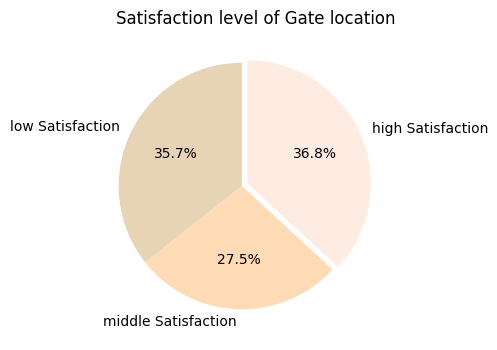

In [44]:
satisfaction_4_5 = df["Gate location"].isin([4, 5]).sum()
satisfaction_3 = df["Gate location"].isin([3]).sum()

low_satisfaction = df["Gate location"].isin([1, 2]).sum()

sizes = [low_satisfaction, satisfaction_3 ,satisfaction_4_5   ]
label_name = np.array(["low Satisfaction", "middle Satisfaction" ,"high Satisfaction"])

plt.figure(figsize=(11, 4))

plt.subplot(1, 2, 2)
plt.title("Satisfaction level of Gate location", loc="right")
plt.pie(sizes, labels=label_name, autopct='%1.01f%%', startangle=90, colors=["#E7D4B5", "#FFDBB5" , "#FEECE2"], explode=(0 ,0 ,0.05 ))


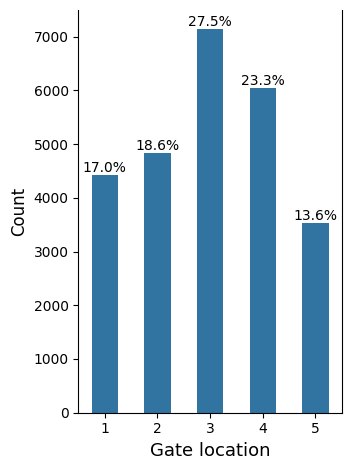

In [45]:
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Gate location', data=df, width=0.5)

total = df['Gate location'].count()
percentages = (df['Gate location'].value_counts() / total) * 100

ax.spines['top'].set_position(('axes', 1.03))

addlabels(ax.patches, percentages)

plt.xlabel("Gate location", fontsize=13)
plt.ylabel("Count", fontsize=12)


plt.tight_layout()
plt.show()


In [46]:
crosstab= pd.crosstab(df["Gender"] , df["Gate location"])
crosstab

Gate location,1,2,3,4,5
Gender,,,,,
Female,2202,2394,3739,3061,1768
Male,2222,2437,3400,2976,1757


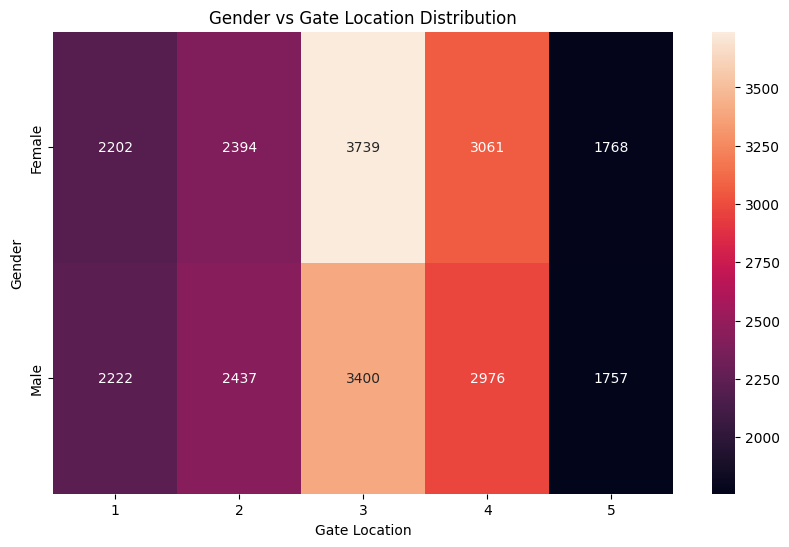

In [47]:
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cbar=True ,edgecolor="black")

plt.title('Gender vs Gate Location Distribution')
plt.xlabel('Gate Location')
plt.ylabel('Gender')

plt.show()

In [48]:
crosstab = pd.crosstab(df["Type of Travel"] , df["Gate location"])
crosstab

Gate location,1,2,3,4,5
Type of Travel,,,,,
Business travel,3232,3448,4364,4049,2928
Personal Travel,1192,1383,2775,1988,597


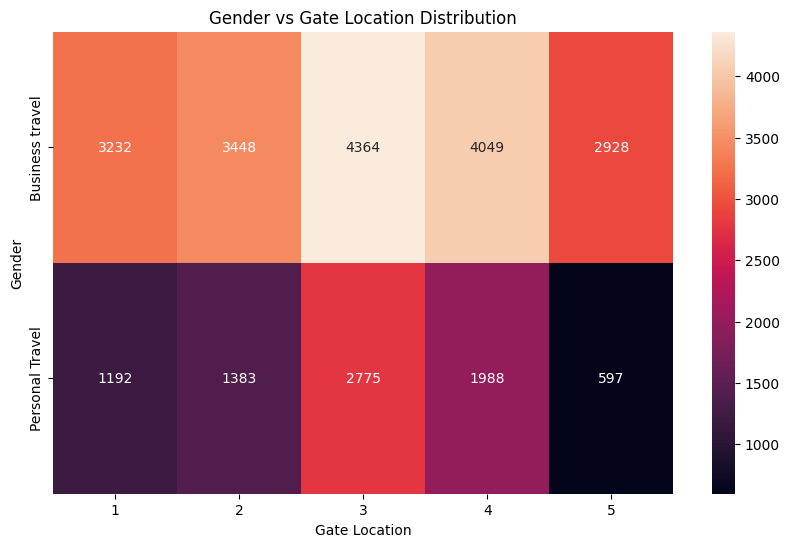

In [49]:
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cbar=True ,edgecolor="black")

plt.title('Gender vs Gate Location Distribution')
plt.xlabel('Gate Location')
plt.ylabel('Gender')

plt.show()


In [50]:
crosstab = pd.crosstab(df["satisfaction"] , df["Gate location"])
crosstab

Gate location,1,2,3,4,5
satisfaction,,,,,
neutral or dissatisfied,2159,2530,4666,3626,1583
satisfied,2265,2301,2473,2411,1942


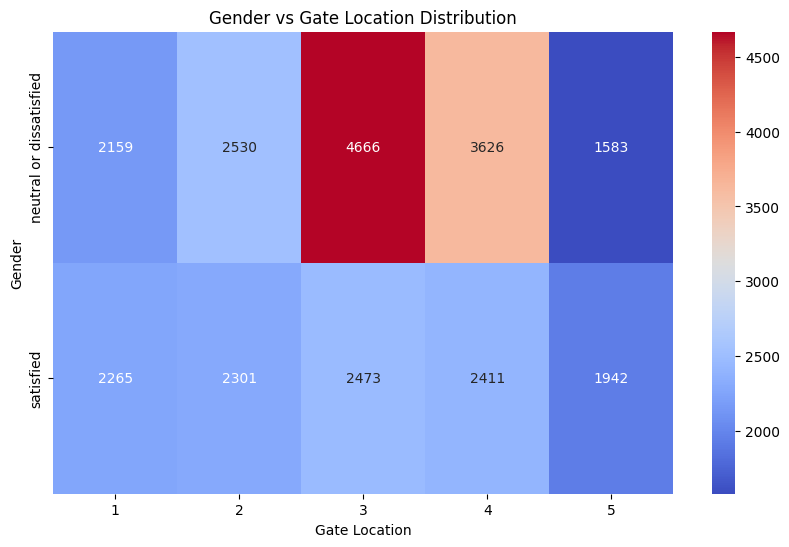

In [51]:
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cbar=True ,cmap="coolwarm")

plt.title('Gender vs Gate Location Distribution')
plt.xlabel('Gate Location')
plt.ylabel('Gender')

plt.show()

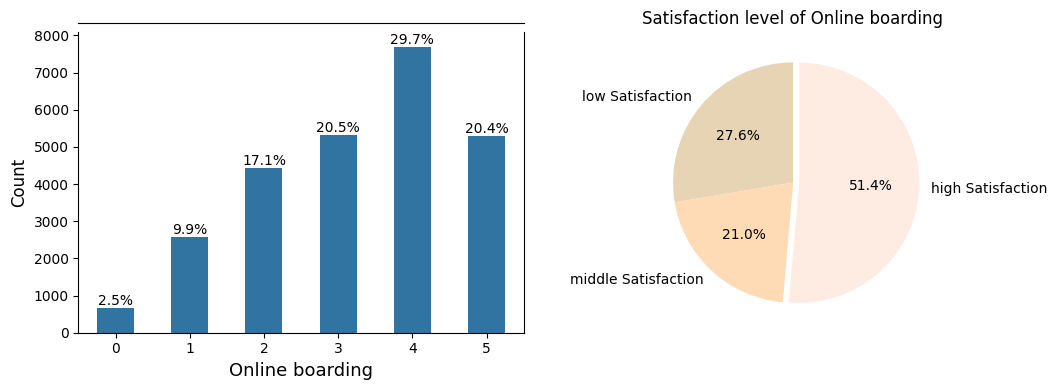

In [52]:
satisfaction_4_5 = df["Online boarding"].isin([4, 5]).sum()
satisfaction_3 = df["Online boarding"].isin([3]).sum()

low_satisfaction = df["Online boarding"].isin([1, 2]).sum()

sizes = [low_satisfaction, satisfaction_3 ,satisfaction_4_5   ]
label_name = np.array(["low Satisfaction", "middle Satisfaction" ,"high Satisfaction"])

plt.figure(figsize=(11, 4))

plt.subplot(1, 2, 2)
plt.title("Satisfaction level of Online boarding", loc="right")
plt.pie(sizes, labels=label_name, autopct='%1.01f%%', startangle=90, colors=["#E7D4B5", "#FFDBB5" , "#FEECE2"], explode=(0 , 0, 0.05))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='Online boarding', data=df, width=0.5)

total = df['Online boarding'].count()
percentages = (df['Online boarding'].value_counts() / total) * 100

ax.spines['top'].set_position(('axes', 1.03))

addlabels(ax.patches, percentages)

plt.xlabel("Online boarding", fontsize=13)
plt.ylabel("Count", fontsize=12)


plt.tight_layout()
plt.show()


In [53]:
data= df.groupby("Type of Travel")["Online boarding"].value_counts(normalize=True).mul(100).round(2).unstack()
data

Online boarding,0,1,2,3,4,5
Type of Travel,,,,,,
Business travel,1.75,7.90,14.56,18.41,33.18,24.22
Personal Travel,4.25,14.42,22.72,25.10,21.66,11.85


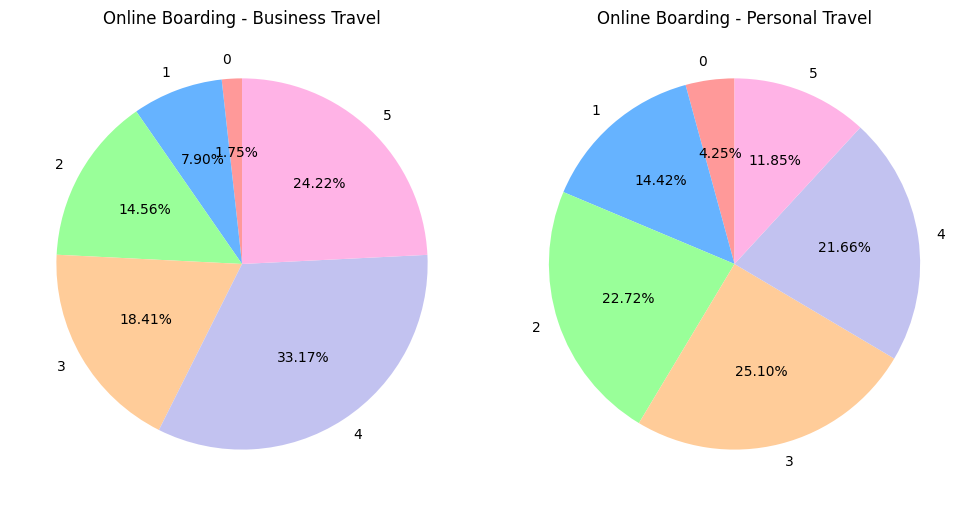

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

axes[0].pie(data.loc["Business travel"], labels=data.columns, autopct='%1.2f%%', startangle=90, colors=colors)
axes[0].set_title('Online Boarding - Business Travel')

axes[1].pie(data.loc["Personal Travel"], labels=data.columns, autopct='%1.2f%%', startangle=90, colors=colors)
axes[1].set_title('Online Boarding - Personal Travel')

plt.tight_layout()
plt.show()

In [55]:
personal_travel_counts = df[df["Type of Travel"] == "Personal Travel"]
total_counts = personal_travel_counts["Online boarding"].value_counts().get(1, 0) + personal_travel_counts["Online boarding"].value_counts().get(2, 0)

print("Total counts for Personal Travel with Online boarding 1 and 2:", total_counts)
print("Total counts for Personal Travel with Online boarding 1 and 2:", (total_counts/personal_travel_counts.count()["Online boarding"])*100 )

Total counts for Personal Travel with Online boarding 1 and 2: 2947
Total counts for Personal Travel with Online boarding 1 and 2: 37.13925645872716


In [56]:
personal_travel_counts = df[df["Type of Travel"] == "Personal Travel"]
online_boarding_counts = personal_travel_counts["Online boarding"].value_counts().sort_index()

print("Counts for each value in Online boarding for Personal Travel:")
print(online_boarding_counts)
total_sum = online_boarding_counts.loc[[1, 2]].sum()
print("\nTotal counts for Personal Travel with Online boarding 1 and 2:",total_sum )

Counts for each value in Online boarding for Personal Travel:
Online boarding
0     337
1    1144
2    1803
3    1992
4    1719
5     940
Name: count, dtype: int64

Total counts for Personal Travel with Online boarding 1 and 2: 2947


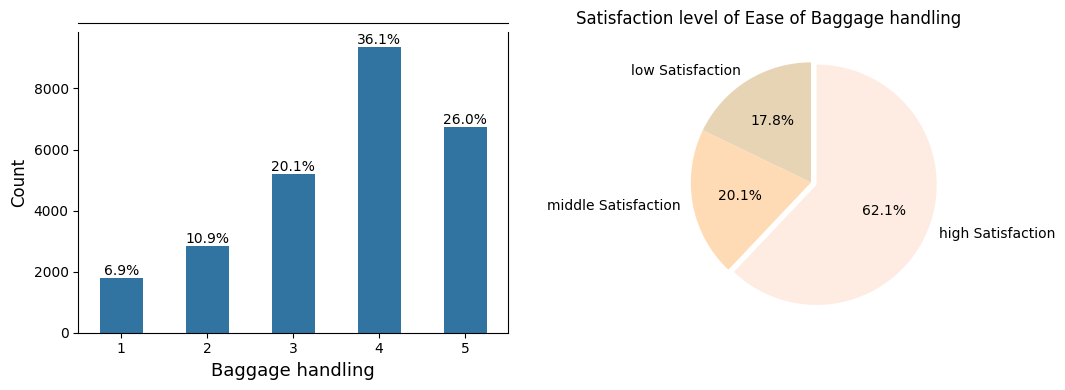

In [57]:
satisfaction_4_5 = df["Baggage handling"].isin([4, 5]).sum()
satisfaction_3 = df["Baggage handling"].isin([3]).sum()

low_satisfaction = df["Baggage handling"].isin([1, 2]).sum()

sizes = [ low_satisfaction, satisfaction_3 ,satisfaction_4_5   ]
label_name = np.array([ "low Satisfaction", "middle Satisfaction" ,"high Satisfaction"])

plt.figure(figsize=(11, 4))

plt.subplot(1, 2, 2)
plt.title("Satisfaction level of Ease of Baggage handling", loc="right")
plt.pie(sizes, labels=label_name, autopct='%1.1f%%', startangle=90, colors=["#E7D4B5" ,"#FFDBB5" , "#FEECE2"  ], explode=( 0,0, 0.05 ))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='Baggage handling', data=df, width=0.5)
total = df['Baggage handling'].count()
percentages = (df['Baggage handling'].value_counts() / total) * 100

ax.spines['top'].set_position(('axes', 1.03))

addlabels(ax.patches, percentages)

plt.xlabel("Baggage handling", fontsize=13)
plt.ylabel("Count", fontsize=12)


plt.tight_layout()
plt.show()

Reasons for Low Satisfaction

Delay in baggage collection: Despite improved systems, delays can sometimes occur in baggage collection, especially at large or crowded airports, causing dissatisfaction for some passengers.

Baggage damage: Some passengers may experience baggage damage during transport, which contributes to low satisfaction ratings.

Baggage Loss: Although the percentage of baggage loss may be small, it leads to very low valuations when it occurs. Loss of baggage can have a significant impact on the overall customer experience.

Reasons for high satisfaction

Effective procedures and technology: Many airports and airlines have developed baggage handling procedures through the use of modern and automated systems to ensure fast and efficient baggage delivery. Tracking baggage through RFID or barcode systems can reduce baggage loss and enhance customer satisfaction.

Strict safety rules: In recent years, baggage safety procedures have become stricter which has reduced the chances of baggage damage or loss, and this increases customer satisfaction.

Improve customer experience: Some airlines improve the customer experience by providing services such as baggage drop-to-door or providing quick reimbursements in case of baggage delays, which enhances overall satisfaction

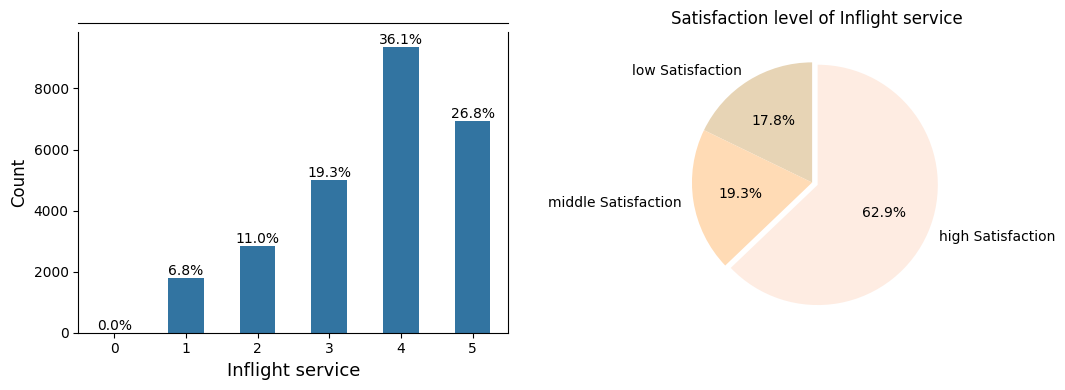

In [58]:
satisfaction_4_5 = df["Inflight service"].isin([4, 5]).sum()
satisfaction_3 = df["Inflight service"].isin([3]).sum()

low_satisfaction = df["Inflight service"].isin([1, 2]).sum()

sizes = [low_satisfaction, satisfaction_3 ,satisfaction_4_5   ]
label_name = np.array(["low Satisfaction", "middle Satisfaction" ,"high Satisfaction"])

plt.figure(figsize=(11, 4))

plt.subplot(1, 2, 2)
plt.title("Satisfaction level of Inflight service", loc="right")
plt.pie(sizes, labels=label_name, autopct='%1.01f%%', startangle=90, colors=["#E7D4B5", "#FFDBB5" , "#FEECE2"], explode=(0 ,0 ,0.05))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='Inflight service', data=df, width=0.5)

total = df['Inflight service'].count()
percentages = (df['Inflight service'].value_counts() / total) * 100

ax.spines['top'].set_position(('axes', 1.03))

addlabels(ax.patches, percentages)

plt.xlabel("Inflight service", fontsize=13)
plt.ylabel("Count", fontsize=12)


plt.tight_layout()
plt.show()

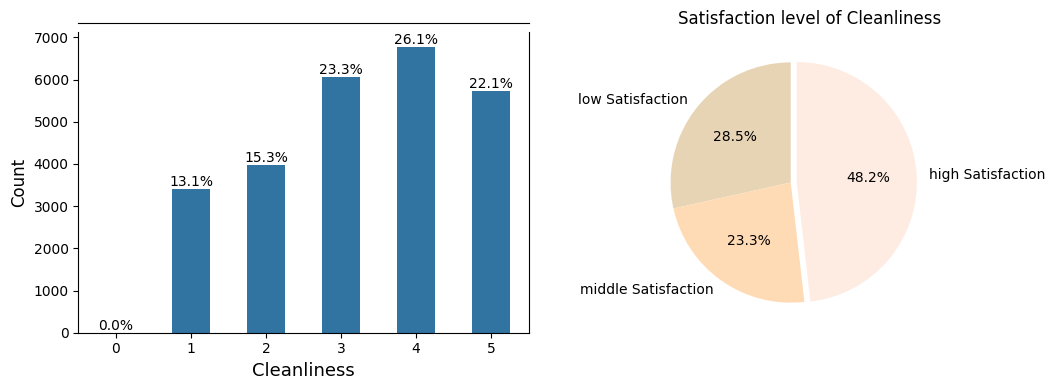

In [59]:
satisfaction_4_5 = df["Cleanliness"].isin([4, 5]).sum()
satisfaction_3 = df["Cleanliness"].isin([3]).sum()
low_satisfaction = df["Cleanliness"].isin([1, 2]).sum()

sizes = [low_satisfaction, satisfaction_3 ,satisfaction_4_5   ]
label_name = np.array(["low Satisfaction", "middle Satisfaction" ,"high Satisfaction"])

plt.figure(figsize=(11, 4))

plt.subplot(1, 2, 2)
plt.title("Satisfaction level of Cleanliness", loc="right")
plt.pie(sizes, labels=label_name, autopct='%1.01f%%', startangle=90, colors=["#E7D4B5", "#FFDBB5" , "#FEECE2"], explode=(0 , 0 ,0.05))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='Cleanliness', data=df, width=0.5)

total = df['Cleanliness'].count()
percentages = (df['Cleanliness'].value_counts() / total) * 100

ax.spines['top'].set_position(('axes', 1.03))
addlabels(ax.patches, percentages)

plt.xlabel("Cleanliness", fontsize=13)
plt.ylabel("Count", fontsize=12)


plt.tight_layout()
plt.show()

In [60]:
df.groupby(["Class"])["Cleanliness"].value_counts(normalize=True).mul(100).round(2).unstack()


Cleanliness,0,1,2,3,4,5
Class,,,,,,
Business,NaN,9.08,11.03,25.80,29.05,25.03
Eco,0.01,16.89,19.12,21.29,23.29,19.40
Eco Plus,0.05,16.90,20.45,19.77,24.20,18.62


In [61]:
df.groupby(["Customer Type"])["Cleanliness"].value_counts(normalize=True).mul(100).round(2).unstack()

Cleanliness,0,1,2,3,4,5
Customer Type,,,,,,
Loyal Customer,0.01,12.17,14.34,24.01,27.07,22.40
disloyal Customer,NaN,17.37,19.70,20.43,21.97,20.53


In [62]:
df.groupby(["Food and drink"])["Cleanliness"].value_counts(normalize=True).mul(100).round(2).unstack()

Cleanliness,0,1,2,3,4,5
Food and drink,,,,,,
0,8.0,32.00,16.00,20.00,12.00,12.00
1,NaN,78.23,6.63,6.07,6.32,2.74
2,NaN,4.30,57.12,14.04,12.67,11.87
3,NaN,4.12,4.63,66.67,13.97,10.62
4,NaN,3.50,3.53,11.89,70.86,10.21
5,NaN,3.79,3.71,12.50,13.03,66.97


In [63]:
df.groupby(["Seat comfort"])["Cleanliness"].value_counts(normalize=True).mul(100).round(2).unstack()

Cleanliness,0,1,2,3,4,5
Seat comfort,,,,,,
1,NaN,74.60,6.86,6.20,6.60,5.74
2,NaN,6.69,72.70,8.13,7.66,4.82
3,NaN,9.62,11.17,63.93,11.24,4.04
4,0.03,4.27,5.47,18.06,56.97,15.19
5,NaN,1.78,2.66,17.61,18.49,59.46


In [64]:
df.groupby(["Departure/Arrival time convenient"])["Cleanliness"].value_counts(normalize=True).mul(100).round(2).unstack()

Cleanliness,0,1,2,3,4,5
Departure/Arrival time convenient,,,,,,
0,NaN,14.55,16.58,22.81,23.97,22.09
1,NaN,12.14,13.93,23.64,27.30,23.00
2,NaN,13.34,14.67,23.57,27.44,20.99
3,NaN,13.24,16.05,22.10,25.75,22.85
4,NaN,13.78,15.63,23.08,25.28,22.23
5,0.04,12.51,15.60,24.39,26.09,21.38


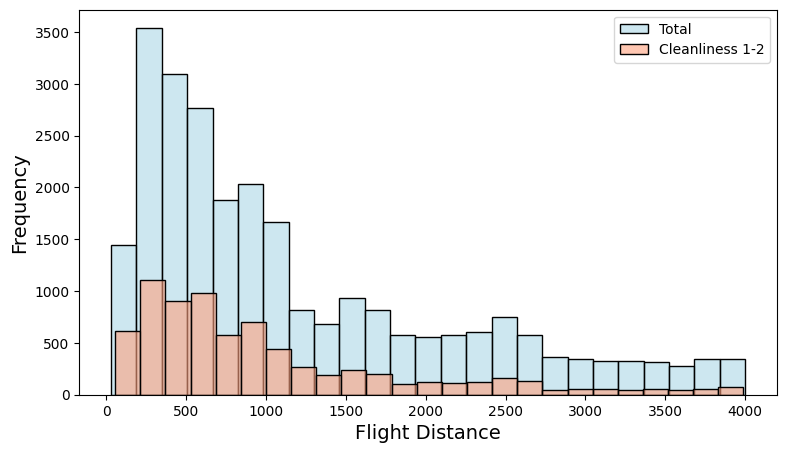

In [65]:
plt.figure(figsize=(9, 5))
sns.histplot(data=df, x="Flight Distance", bins=25, color='lightblue', alpha=0.6, label='Total')
sns.histplot(data=df[df["Cleanliness"].isin([1, 2])],
             x="Flight Distance", bins=25,  color='#FFA27F', alpha=0.6, label='Cleanliness 1-2')

plt.xlabel("Flight Distance", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend()

plt.show()

In [66]:
cut_series = pd.cut(df['Flight Distance'], bins=[0, 1000, 2000, 3000, 4000, 5000], labels=['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000'])
distribution_counts = pd.crosstab(cut_series, df['Cleanliness'].isin([1, 2]), ).rename(columns={True: "   Cleanliness 1-2", False: "Total"})

distribution_percentages = pd.crosstab(cut_series, df['Cleanliness'].isin([1, 2]), normalize='columns').mul(100).round(2).rename(columns={True: "     Cleanliness 1-2", False: "Total"})

print("Distribution (Counts):")
print(distribution_counts)
print("\nDistribution (Percentages):")
print(distribution_percentages)

Distribution (Counts):
Cleanliness      Total     Cleanliness 1-2
Flight Distance                           
0-1000           10163                4875
1000-2000         3991                1493
2000-3000         2732                 674
3000-4000         1682                 346

Distribution (Percentages):
Cleanliness      Total       Cleanliness 1-2
Flight Distance                             
0-1000           54.73                 65.99
1000-2000        21.49                 20.21
2000-3000        14.71                  9.12
3000-4000         9.06                  4.68


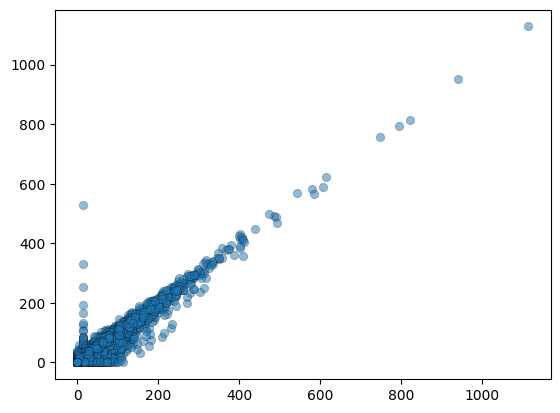

In [67]:
plt.scatter(df['Arrival Delay in Minutes'], df['Departure Delay in Minutes'], alpha = 0.5 ,  linewidths=0.3 ,edgecolors='black')

The results obtained are quite logical and can be explained as follows. If the flight of the airline's customers was delayed by a certain amount of time at departure, then the flight will be delayed by about the same amount of time at landing (provided that the aircraft does not accelerate in flight to make up for lost time).

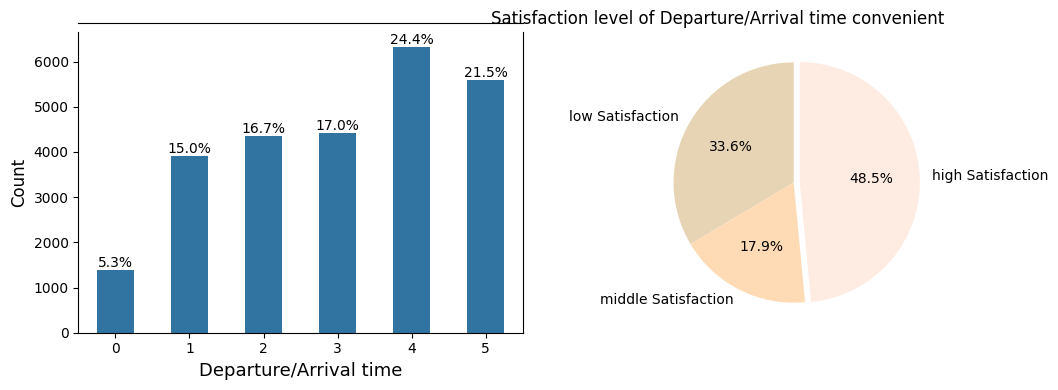

In [68]:
satisfaction_4_5 = df["Departure/Arrival time convenient"].isin([4, 5]).sum()
satisfaction_3 = df["Departure/Arrival time convenient"].isin([3]).sum()

low_satisfaction = df["Departure/Arrival time convenient"].isin([1, 2]).sum()

sizes = [low_satisfaction, satisfaction_3 ,satisfaction_4_5   ]
label_name = np.array(["low Satisfaction", "middle Satisfaction" ,"high Satisfaction"])

plt.figure(figsize=(11, 4))

plt.subplot(1, 2, 2)
plt.title("Satisfaction level of Departure/Arrival time convenient", loc="right")
plt.pie(sizes, labels=label_name, autopct='%1.1f%%', startangle=90, colors=["#E7D4B5", "#FFDBB5" , "#FEECE2"], explode=(0 ,0 , 0.05))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='Departure/Arrival time convenient', data=df, width=0.5)
total = df['Departure/Arrival time convenient'].count()
percentages = (df['Departure/Arrival time convenient'].value_counts() / total) * 100

ax.spines['top'].set_position(('axes', 1.03))

addlabels(ax.patches, percentages)

plt.xlabel("Departure/Arrival time", fontsize=13)
plt.ylabel("Count", fontsize=12)


plt.tight_layout()
plt.show()

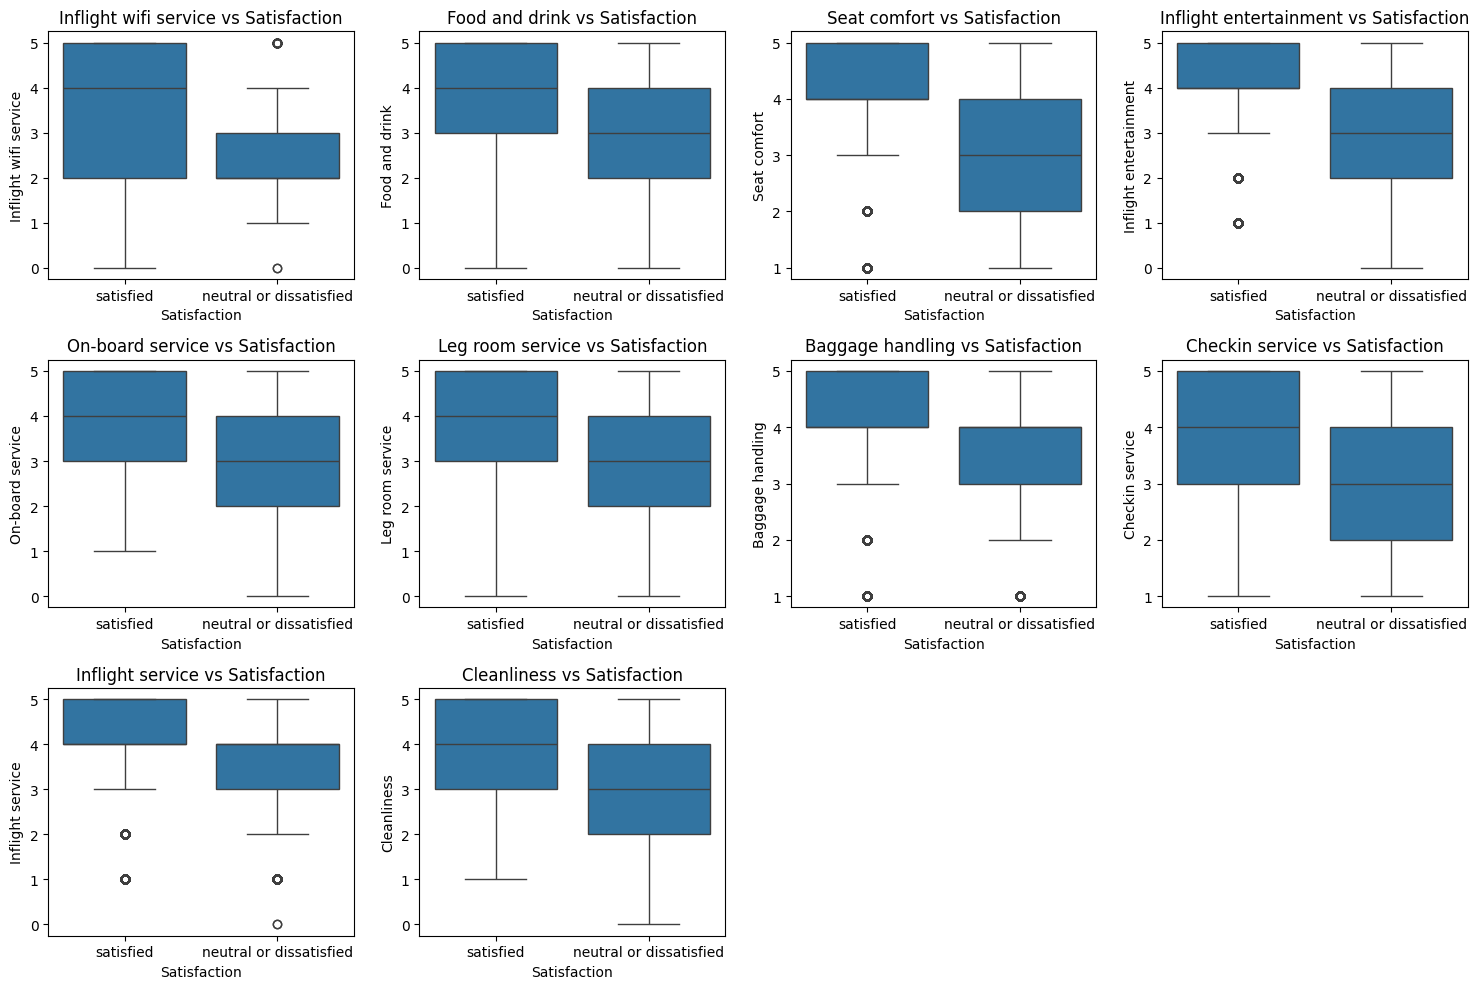

In [69]:
services = ['Inflight wifi service', 'Food and drink', 'Seat comfort', 'Inflight entertainment',
            'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service',
            'Inflight service', 'Cleanliness']

plt.figure(figsize=(15, 10))
for i, service in enumerate(services):
    plt.subplot(3, 4, i+1)
    sns.boxplot(data=df, x='satisfaction', y=service)
    plt.title(f'{service} vs Satisfaction')
    plt.xlabel('Satisfaction')
    plt.ylabel(service)

plt.tight_layout()
plt.show()

In [70]:
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Type of Travel'] = le.fit_transform(df['Type of Travel'])
df['Customer Type'] = le.fit_transform(df['Customer Type'])
df['Class'] = le.fit_transform(df['Class'])

df['satisfaction'] = le.fit_transform(df['satisfaction'])

In [71]:
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [72]:
X

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,0,52,0,1,160,5,4,3,...,3,5,5,5,5,2,5,5,50,44.0
1,1,0,0,36,0,0,2863,1,1,3,...,5,4,4,4,4,3,4,5,0,0.0
2,2,1,1,20,0,1,192,2,0,2,...,2,2,4,1,3,2,2,2,0,0.0
3,3,1,0,44,0,0,3377,0,0,0,...,4,1,1,1,1,3,1,4,0,6.0
4,4,0,0,49,0,1,1182,2,3,4,...,2,2,2,2,2,4,2,4,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,1,1,34,0,0,526,3,3,3,...,4,4,3,2,4,4,5,4,0,0.0
25972,25972,1,0,23,0,0,646,4,4,4,...,4,4,4,5,5,5,5,4,0,0.0
25973,25973,0,0,17,1,1,828,2,5,1,...,2,2,4,3,4,5,4,2,0,0.0
25974,25974,1,0,14,0,0,1127,3,3,3,...,4,4,3,2,5,4,5,4,0,0.0


In [73]:
y

,satisfaction
0,1
1,1
2,0
3,1
4,1
...,...
25971,0
25972,1
25973,0
25974,1


In [74]:
columns_to_scale = ['Flight Distance', 'Age', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg * 100:.2f}%')

print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 84.26%
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      2936
           1       0.80      0.85      0.82      2256

    accuracy                           0.84      5192
   macro avg       0.84      0.84      0.84      5192
weighted avg       0.84      0.84      0.84      5192



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print(classification_report(y_test, y_pred))

Accuracy: 93.22%
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2936
           1       0.92      0.92      0.92      2256

    accuracy                           0.93      5192
   macro avg       0.93      0.93      0.93      5192
weighted avg       0.93      0.93      0.93      5192



In [80]:
rf_clf = RandomForestClassifier(random_state=42)

rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')

print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 95.26%
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2936
           1       0.95      0.94      0.95      2256

    accuracy                           0.95      5192
   macro avg       0.95      0.95      0.95      5192
weighted avg       0.95      0.95      0.95      5192



In [83]:
xgb_clf = XGBClassifier(random_state=42)

xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb * 100:.2f}%')

XGBoost Accuracy: 95.84%


In [84]:
from joblib import dump , load

dump(xgb_clf, 'XGBoost_model.joblib')

['XGBoost_model.joblib']

In [85]:
model = load('XGBoost_model.joblib')

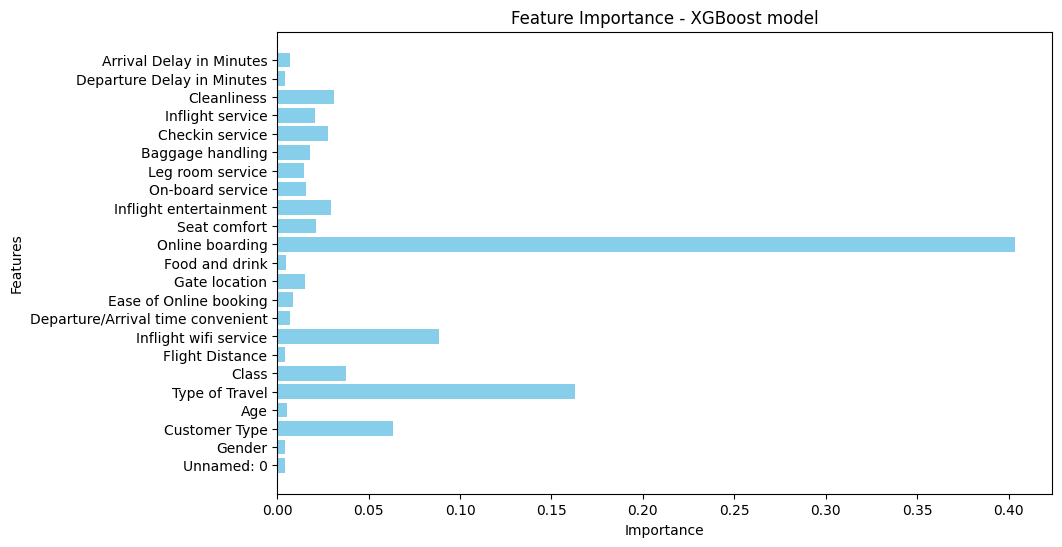

In [86]:
feature_importances = model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances,color='skyblue')
plt.title('Feature Importance - XGBoost model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [87]:
y_pred = model.predict(X_test)

print("Confusion Matrix:")
cm=confusion_matrix(y_test, y_pred)
print(cm)

Confusion Matrix:
[[2836  100]
 [ 116 2140]]


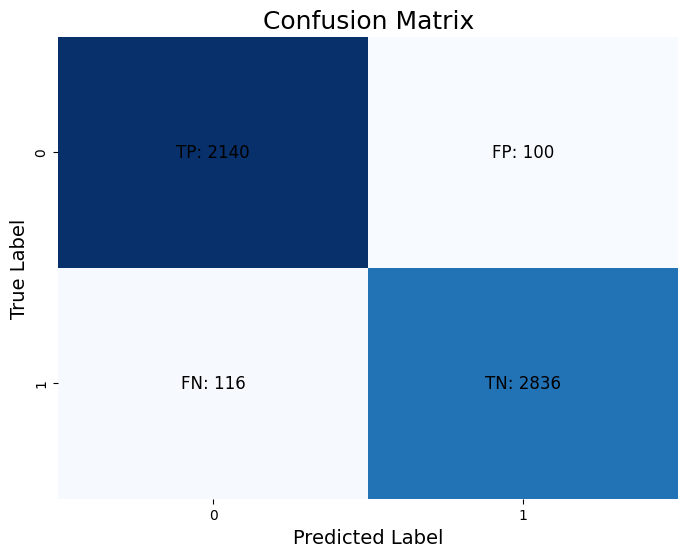

In [88]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm,   cmap='Blues', cbar=False, annot_kws={"size": 16})

plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)


plt.text(0.5, 0.5, f'TP: {cm[1, 1]}', ha='center', va='center', fontsize=12, color='black')
plt.text(0.5, 1.5, f'FN: {cm[1, 0]}', ha='center', va='center', fontsize=12, color='black')
plt.text(1.5, 0.5, f'FP: {cm[0, 1]}', ha='center', va='center', fontsize=12, color='black')
plt.text(1.5, 1.5, f'TN: {cm[0, 0]}', ha='center', va='center', fontsize=12, color='black')

plt.show()

In [89]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.96
Recall: 0.95
F1-Score: 0.95
